# DCBC model evaluation

In [117]:

import ProbabilisticParcellation.evaluate as ev
import ProbabilisticParcellation.util as ut
import ProbabilisticParcellation.functional_profiles as fp
import Functional_Fusion.dataset as ds
import matplotlib.pyplot as plt
import seaborn as sb
import pandas as pd
from scipy import stats
import glob
import numpy as np
import os



In [118]:
# Import Data
Data = pd.read_csv(f'{ut.model_dir}/Models/Evaluation/evaluation_dcbc.tsv', sep='\t')

In [119]:
# Define colours
sb.color_palette(sb.color_palette("tab10"))
# Get the first three colors in the "tab10" color palette
colors = sb.color_palette("tab10", n_colors=3)
hex_codes_single = [
    f"#{int(r * 255):02x}{int(g * 255):02x}{int(b * 255):02x}" for r, g, b in colors]
# Repeat colours to get 6 colours
hex_codes = np.repeat(hex_codes_single, 2)

# Group DCBC and Individual DCBC in one plot for Fusion atlas

In [120]:
# Melt Data
Data_melted = pd.melt(Data[Data['Training']=='Leave_one_out'], id_vars=['K', 'Training', 'symmetry'], value_vars=['dcbc_group', 'dcbc_indiv'], var_name='dcbc_type', value_name='DCBC')
Data_melted.head()

,K,Training,symmetry,dcbc_type,DCBC
0,10,Leave_one_out,Symmetric,dcbc_group,0.038595
1,10,Leave_one_out,Symmetric,dcbc_group,0.012023
2,10,Leave_one_out,Symmetric,dcbc_group,-0.009863
3,10,Leave_one_out,Symmetric,dcbc_group,0.108692
4,10,Leave_one_out,Symmetric,dcbc_group,0.120695


In [121]:
fusion_orange = '#ff7f0e'
fusion_orange = list(np.repeat(fusion_orange,2))

<Figure size 1000x2000 with 0 Axes>

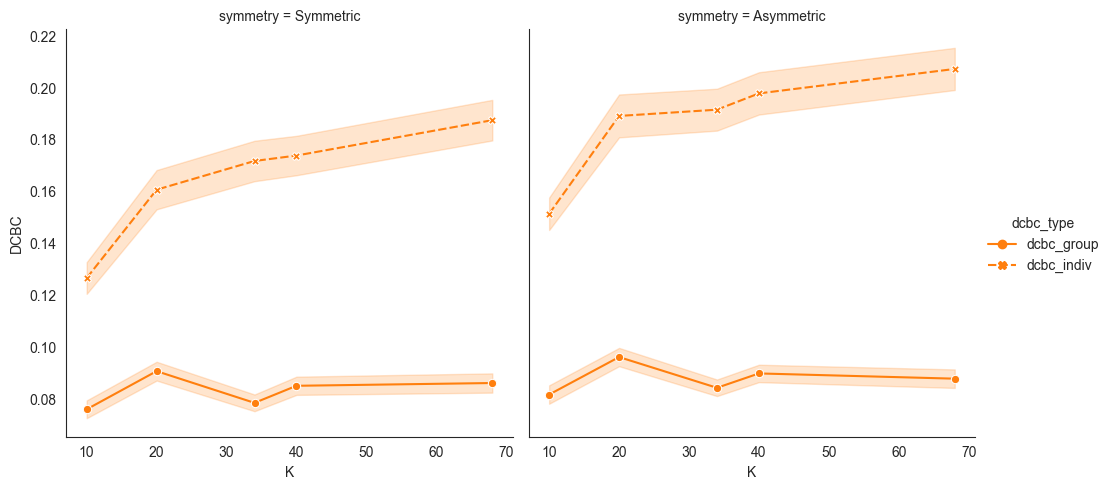

In [122]:
# Plot only fused DCBC results
hex_codes_fusion = np.repeat(hex_codes_single[1:], 4)
figsize = (10, 20)
plt.figure(figsize=figsize)
sb.set_style("white")
sb.relplot(
    data=Data_melted[Data_melted['K'].isin([10, 20, 34, 40, 68])], x="K", y="DCBC", hue="dcbc_type", kind="line", col="symmetry", markers=True, errorbar="se", palette = fusion_orange, style="dcbc_type")
plt.savefig(f'{ut.figure_dir}/DCBC_group_indiv.pdf')


## DCBC Group: Single vs. Fusion atlas, Asymmetric vs Symmetric

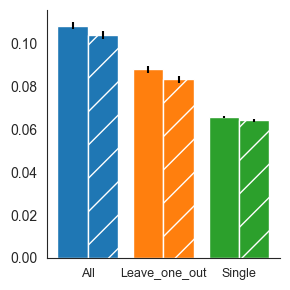

In [123]:
figsize = (3, 3)

# Bar graph at K=68 with hue = Symmetry where hue bars are next to each other
# Define the data
categories = Data[Data['K'].isin([10, 20, 34, 40, 68])].Training.unique()
hues = Data[Data['K'].isin([10, 20, 34, 40, 68])].symmetry.unique()

# Calculate the mean values for each category and hue combination
mean_values = Data[Data['K'].isin([10, 20, 34, 40, 68])].groupby(['Training', 'symmetry'])[
    'dcbc_group'].mean().values

# Calculate the standard error of the mean for each category and hue combination
sem_values = Data[Data['K'].isin([10, 20, 34, 40, 68])].groupby(['Training', 'symmetry'])[
    'dcbc_group'].sem().values

# Define the colors for each category
colors = sb.color_palette("tab10", n_colors=len(categories))

# Create a figure and axis
fig, ax = plt.subplots(figsize=figsize)

# Iterate over each category
for i, category in enumerate(categories):
    # Get the color for the current category
    color = colors[i]

    # Plot the bars for the two hues
    j = 2 * i
    ax.bar([i - 0.2, i + 0.2], mean_values[j:j + len(hues)], width=0.4,
           yerr=sem_values[j:j + len(hues)],
           color=color, label=hues)
    
    # Set a different hatch for every second bar
    ax.patches[j+1].set_hatch('/')

# Set the x-axis tick labels
ax.set_xticks(range(len(categories)))
ax.set_xticklabels(categories)
# Smaller xtick labels  
ax.tick_params(axis='x', which='major', labelsize=9)

# plt.legend()
# Tight layout and despine
fig.tight_layout()
sb.despine()
# Export the plot at high resolution
plt.savefig(f'{ut.figure_dir}/DCBC_group_bar_avg.pdf', dpi=300)


## DCBC Individual: Single vs. Fusion atlas, Asymmetric vs Symmetric

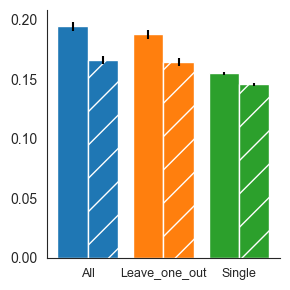

In [124]:
# Bar graph at K=68 with hue = Symmetry where hue bars are next to each other
sb.color_palette(sb.color_palette("tab10"))
# Get the first three colors in the "tab10" color palette
colors = sb.color_palette("tab10", n_colors=3)
hex_codes = [
    f"#{int(r * 255):02x}{int(g * 255):02x}{int(b * 255):02x}" for r, g, b in colors]
# Repeat colours to get 6 colours
hex_codes = np.repeat(hex_codes, 2)

# Define the data
categories = Data[Data['K'].isin([10, 20, 34, 40, 68])].Training.unique()
hues = Data[Data['K'].isin([10, 20, 34, 40, 68])].symmetry.unique()

# Calculate the mean values for each category and hue combination
mean_values = Data[Data['K'].isin([10, 20, 34, 40, 68])].groupby(['Training', 'symmetry'])[
    'dcbc_indiv'].mean().values

# Calculate the standard error of the mean for each category and hue combination
sem_values = Data[Data['K'].isin([10, 20, 34, 40, 68])].groupby(['Training', 'symmetry'])[
    'dcbc_indiv'].sem().values

# Define the colors for each category
colors = sb.color_palette("tab10", n_colors=len(categories))

# Create a figure and axis
fig, ax = plt.subplots(figsize=figsize)

# Iterate over each category
for i, category in enumerate(categories):
    # Get the color for the current category
    color = colors[i]

    # Plot the bars for the two hues
    j = 2 * i
    ax.bar([i - 0.2, i + 0.2], mean_values[j:j + len(hues)], width=0.4,
           yerr=sem_values[j:j + len(hues)],
           color=color, label=hues)

    # Set a different hatch for every second bar
    ax.patches[j + 1].set_hatch('/')

# Set the x-axis tick labels
ax.set_xticks(range(len(categories)))
ax.set_xticklabels(categories)
# Smaller xtick labels
ax.tick_params(axis='x', which='major', labelsize=9)

# plt.legend()
# Tight layout and despine
fig.tight_layout()
sb.despine()
# Export the plot at high resolution
plt.savefig(f'{ut.figure_dir}/DCBC_group_bar_individual_avg.pdf', dpi=300)


# Stats

In [125]:
# Add subject variables
datasets = Data['test_data'].unique()
Data['participant_id'] = ''
for dset in datasets:
    # Import participant info
    dataset = ds.get_dataset_class(ut.base_dir, dset)
    participants = dataset.get_participants().participant_id.tolist()
    participants = [dset + '_' + p for p in participants]
    select_rows = (Data['test_data'] == dset)
    Data['participant_id'][select_rows] = participants*int(len(select_rows)/len(participants))



/var/folders/y1/13zjm1t50ms6ds24c69y7vx40000gn/T/ipykernel_27334/2081741850.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Data['participant_id'][select_rows] = participants*int(len(select_rows)/len(participants))
/var/folders/y1/13zjm1t50ms6ds24c69y7vx40000gn/T/ipykernel_27334/2081741850.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Data['participant_id'][select_rows] = participants*int(len(select_rows)/len(participants))
/var/folders/y1/13zjm1t50ms6ds24c69y7vx40000gn/T/ipykernel_27334/2081741850.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the cav

In [126]:
# -- Single dataset parcellations: average across two halves within each subject for each model, K and symmetry -- #
# Step 1: Group the data for single dataset parcellations by subject
grouped_data = Data[Data['Training']=='Single'].groupby(['participant_id', 'K', 'symmetry'])
# Step 2: Get the highest/average value for each subject
averaged_data = grouped_data[['dcbc_indiv', 'dcbc_group']].mean() # .max() for highest value
# Step 3: Create a new DataFrame with one row per subject and the highest value
Data_single = averaged_data.reset_index()

# -- Fusion parcellations: average across two halves within each subject for each model, K and symmetry -- #
# Step 1: Group the data for fusion parcellations by subject
grouped_data = Data[Data['Training']=='Leave_one_out'].groupby(['participant_id', 'K', 'symmetry'])
# Step 2: Get the mean value for each subject
Data_fusion = grouped_data[['dcbc_indiv', 'dcbc_group']].mean().reset_index()

# Fused vs. Best single dataset: Group DCBC

In [132]:
# Save Data_fusion and Data_single to ../data/evaluation_dcbc_fusion.tsv and ../data/evaluation_dcbc_single.tsv
Data_fusion[Data_fusion['K'].isin([10, 20, 34, 40, 68])].to_csv(f'../data/evaluation_dcbc_fusion.tsv', sep='\t', index=False)
Data_single[Data_single['K'].isin([10, 20, 34, 40, 68])].to_csv(f'../data/evaluation_dcbc_single.tsv', sep='\t', index=False)

In [72]:
# -- Test averaged across all Ks -- #
# Single vs cross-validated Fused
dat1 = Data_single[(Data_single['symmetry'] == 'Symmetric')  & Data_single['K'].isin([10, 20, 34, 40, 68])][['participant_id', 'dcbc_group', 'dcbc_indiv']].groupby(['participant_id']).mean()
dat2 = Data_fusion[(Data_fusion['symmetry'] == 'Symmetric')  & Data_fusion['K'].isin([10, 20, 34, 40, 68])][['participant_id', 'dcbc_group', 'dcbc_indiv']].groupby(['participant_id']).mean()
res = stats.ttest_rel(dat1['dcbc_group'], dat2['dcbc_group'])
# show degrees of freedom
df = len(dat1) - 1
# Show in scientific notation
print(f'T = {res.statistic:.3f}, p = {res.pvalue:.3e}, df = {df}')


# -- Test for K=68 only -- #
# Single vs cross-validated Fused
dat1 = Data_single[(Data_single['symmetry'] == 'Symmetric')  & (Data_single['K'] == 68) ]
dat2 = Data_fusion[(Data_fusion['symmetry'] == 'Symmetric')  & (Data_fusion['K'] == 68) ]
res = stats.ttest_rel(dat1['dcbc_group'], dat2['dcbc_group'])
df = len(dat1) - 1
# Show in scientific notation
print(f'T = {res.statistic:.3f}, p = {res.pvalue:.3e}, df = {df}')


T = -4.466, p = 1.936e-05, df = 110
T = -2.820, p = 5.697e-03, df = 110


# Fused vs. Best single dataset: Individual DCBC

In [74]:
# -- Test averaged across all Ks -- #
# Single vs cross-validated Fused
dat1 = Data_single[(Data_single['symmetry'] == 'Symmetric')  & Data_single['K'].isin([10, 20, 34, 40, 68])][['participant_id', 'dcbc_group', 'dcbc_indiv']].groupby(['participant_id']).mean()
dat2 = Data_fusion[(Data_fusion['symmetry'] == 'Symmetric')  & Data_fusion['K'].isin([10, 20, 34, 40, 68])][['participant_id', 'dcbc_group', 'dcbc_indiv']].groupby(['participant_id']).mean()
res = stats.ttest_rel(dat1['dcbc_indiv'], dat2['dcbc_indiv'])
# show degrees of freedom
df = len(dat1) - 1
# Show in scientific notation
print(f'T = {res.statistic:.3f}, p = {res.pvalue:.3e}, df = {df}')
# Show in normal notation
print(f'T = {res.statistic:.3f}, p = {res.pvalue:.3f}, df = {df}')

# -- Test for K=68 only -- #
# Single vs cross-validated Fused
dat1 = Data_single[(Data_single['symmetry'] == 'Symmetric')  & (Data_single['K'] == 68) ]
dat2 = Data_fusion[(Data_fusion['symmetry'] == 'Symmetric')  & (Data_fusion['K'] == 68) ]
res = stats.ttest_rel(dat1['dcbc_indiv'], dat2['dcbc_indiv'])
df = len(dat1) - 1
# Show in scientific notation
print(f'T = {res.statistic:.3f}, p = {res.pvalue:.3e}, df = {df}')
# Show in normal notation
print(f'T = {res.statistic:.3f}, p = {res.pvalue:.3f}, df = {df}')


T = -2.564, p = 1.171e-02, df = 110
T = -2.564, p = 0.012, df = 110
T = -3.586, p = 5.018e-04, df = 110
T = -3.586, p = 0.001, df = 110


# Symmetric vs Asymmetric: Group DCBC

In [76]:
# -- Test for K=68 only : Symmetric vs Asymmetric 
# Fused atlas symmetric vs Fused atlas asymmetric 
dat1 = Data_fusion[(Data_fusion['symmetry'] == 'Symmetric')  & (Data_fusion['K'] == 68) ]
dat2 = Data_fusion[(Data_fusion['symmetry'] == 'Asymmetric')  & (Data_fusion['K'] == 68) ]
res = stats.ttest_rel(dat1['dcbc_group'], dat2['dcbc_group'])
df = len(dat1) - 1
# Show in scientific notation
print(f'\nFusion symmetric vs Fusion asymmetric at 68')
print(f'T = {res.statistic:.3f}, p = {res.pvalue:.3e}, df = {df}')
# Show in normal notation
print(f'T = {res.statistic:.3f}, p = {res.pvalue:.3f}, df = {df}')

# -- Averaged across Ks:
dat1 = Data_fusion[(Data_fusion['symmetry'] == 'Symmetric')  & Data_fusion['K'].isin([10, 20, 34, 40, 68])][['participant_id', 'dcbc_group', 'dcbc_indiv']].groupby(['participant_id']).mean()
dat2 = Data_fusion[(Data_fusion['symmetry'] == 'Asymmetric')  & Data_fusion['K'].isin([10, 20, 34, 40, 68])][['participant_id', 'dcbc_group', 'dcbc_indiv']].groupby(['participant_id']).mean()
res = stats.ttest_rel(dat1['dcbc_group'], dat2['dcbc_group'])
# show degrees of freedom
df = len(dat1) - 1
# Show in scientific notation
print(f'\nFusion symmetric vs Fusion asymmetric')
print(f'T = {res.statistic:.3f}, p = {res.pvalue:.3e}, df = {df}')
# Show in normal notation
print(f'T = {res.statistic:.3f}, p = {res.pvalue:.3f}, df = {df}')
# Show percentage reduction
print(f'Percentage reduction = {100*(1 - dat2["dcbc_group"].mean()/dat1["dcbc_group"].mean()):.2f}%')


# -- Averaged across Ks:
dat1 = Data_fusion[(Data_fusion['symmetry'] == 'Symmetric')  & Data_fusion['K'].isin([10, 20, 34, 40, 68])][['participant_id', 'dcbc_group', 'dcbc_indiv']].groupby(['participant_id']).mean()
dat2 = Data_single[(Data_single['symmetry'] == 'Asymmetric')  & Data_single['K'].isin([10, 20, 34, 40, 68])][['participant_id', 'dcbc_group', 'dcbc_indiv']].groupby(['participant_id']).mean()
res = stats.ttest_rel(dat1['dcbc_group'], dat2['dcbc_group'])
# show degrees of freedom
df = len(dat1) - 1
# Show in scientific notation
print(f'\nFusion symmetric vs Single asymmetric')
print(f'T = {res.statistic:.3f}, p = {res.pvalue:.3e}, df = {df}')
# Show in normal notation
print(f'T = {res.statistic:.3f}, p = {res.pvalue:.3f}, df = {df}')

# Symmetric fused atlas vs Asymmetric single dataset atlas cross-validated
dat1 = Data_fusion[(Data_fusion['symmetry'] == 'Symmetric')  & (Data_fusion['K'] == 68) ]
dat2 = Data_single[(Data_single['symmetry'] == 'Asymmetric')  & (Data_single['K'] == 68) ]
res = stats.ttest_rel(dat1['dcbc_group'], dat2['dcbc_group'])
df = len(dat1) - 1
# Show in scientific notation
print(f'\nFusion symmetric vs Single asymmetric at K68')
print(f'T = {res.statistic:.3f}, p = {res.pvalue:.3e}, df = {df}')

# --> No significant difference between asymmetric and symmetric in group dcbc! 


Fusion symmetric vs Fusion asymmetric at 68
T = -0.660, p = 5.108e-01, df = 110
T = -0.660, p = 0.511, df = 110

Fusion symmetric vs Fusion asymmetric
T = -2.344, p = 2.089e-02, df = 110
T = -2.344, p = 0.021, df = 110
Percentage reduction = -5.61%

Fusion symmetric vs Single asymmetric
T = 4.855, p = 4.009e-06, df = 110
T = 4.855, p = 0.000, df = 110

Fusion symmetric vs Single asymmetric at K68
T = 2.788, p = 6.249e-03, df = 110


# Symmetric vs Asymmetric: Individual DCBC

In [77]:
# -- Test for K=68 only : Symmetric vs Asymmetric 
# Fused atlas symmetric vs Fused atlas asymmetric 
dat1 = Data_fusion[(Data_fusion['symmetry'] == 'Symmetric')  & (Data_fusion['K'] == 68) ]
dat2 = Data_fusion[(Data_fusion['symmetry'] == 'Asymmetric')  & (Data_fusion['K'] == 68) ]
res = stats.ttest_rel(dat1['dcbc_indiv'], dat2['dcbc_indiv'])
df = len(dat1) - 1
# Show in scientific notation
print(f'\nFusion symmetric vs Fusion asymmetric at K=68')
print(f'T = {res.statistic:.3f}, p = {res.pvalue:.3e}, df = {df}')
# Show in normal notation
print(f'T = {res.statistic:.3f}, p = {res.pvalue:.3f}, df = {df}')


# -- Averaged across Ks:
dat1 = Data_fusion[(Data_fusion['symmetry'] == 'Symmetric')  & Data_fusion['K'].isin([10, 20, 34, 40, 68])][['participant_id', 'dcbc_group', 'dcbc_indiv']].groupby(['participant_id']).mean()
dat2 = Data_fusion[(Data_fusion['symmetry'] == 'Asymmetric')  & Data_fusion['K'].isin([10, 20, 34, 40, 68])][['participant_id', 'dcbc_group', 'dcbc_indiv']].groupby(['participant_id']).mean()
res = stats.ttest_rel(dat1['dcbc_indiv'], dat2['dcbc_indiv'])
# show degrees of freedom
df = len(dat1) - 1
# Show in scientific notation
print(f'\nFusion symmetric vs Fusion asymmetric')
print(f'T = {res.statistic:.3f}, p = {res.pvalue:.3e}, df = {df}')
# Show in normal notation
print(f'T = {res.statistic:.3f}, p = {res.pvalue:.3f}, df = {df}')
# Show percentage reduction
print(f'Percentage reduction = {100*(1 - dat2["dcbc_indiv"].mean()/dat1["dcbc_indiv"].mean()):.2f}%')

# -- Averaged across Ks:
dat1 = Data_fusion[(Data_fusion['symmetry'] == 'Symmetric')  & Data_fusion['K'].isin([10, 20, 34, 40, 68])][['participant_id', 'dcbc_group', 'dcbc_indiv']].groupby(['participant_id']).mean()
dat2 = Data_single[(Data_single['symmetry'] == 'Asymmetric')  & Data_single['K'].isin([10, 20, 34, 40, 68])][['participant_id', 'dcbc_group', 'dcbc_indiv']].groupby(['participant_id']).mean()
res = stats.ttest_rel(dat1['dcbc_indiv'], dat2['dcbc_indiv'])
# show degrees of freedom
df = len(dat1) - 1
# Show in scientific notation
print(f'\nFusion symmetric vs Single asymmetric')
print(f'T = {res.statistic:.3f}, p = {res.pvalue:.3e}, df = {df}')
# Show in normal notation
print(f'T = {res.statistic:.3f}, p = {res.pvalue:.3f}, df = {df}')


# Symmetric fused atlas vs Asymmetric single dataset atlas cross-validated
dat1 = Data_single[(Data_single['symmetry'] == 'Asymmetric')  & (Data_single['K'] == 68) ]
dat2 = Data_fusion[(Data_fusion['symmetry'] == 'Symmetric')  & (Data_fusion['K'] == 68) ]
res = stats.ttest_rel(dat1['dcbc_indiv'], dat2['dcbc_indiv'])
df = len(dat1) - 1
# Show in scientific notation
print(f'\nFusion symmetric vs Single asymmetric at K=68')
print(f'T = {res.statistic:.3f}, p = {res.pvalue:.3e}, df = {df}')

# --> No significant difference between asymmetric and symmetric in group dcbc! 


Fusion symmetric vs Fusion asymmetric at K=68
T = -4.081, p = 8.510e-05, df = 110
T = -4.081, p = 0.000, df = 110

Fusion symmetric vs Fusion asymmetric
T = -5.023, p = 1.981e-06, df = 110
T = -5.023, p = 0.000, df = 110
Percentage reduction = -14.22%

Fusion symmetric vs Single asymmetric
T = 1.662, p = 9.936e-02, df = 110
T = 1.662, p = 0.099, df = 110

Fusion symmetric vs Single asymmetric at K=68
T = -2.842, p = 5.338e-03, df = 110


# Granularity: Does K=68 perform better than K=40 in the individual? Is there a difference between K=20 and K=68 in the group?

In [78]:

# -- Group DCBC 68 vs 20 -- #
# Single vs cross-validated Fused
dat1 = Data_fusion[(Data_single['symmetry'] == 'Symmetric')  & (Data_single['K'] == 68) ]
dat2 = Data_fusion[(Data_fusion['symmetry'] == 'Symmetric')  & (Data_fusion['K'] == 20) ]
res = stats.ttest_rel(dat1['dcbc_group'], dat2['dcbc_group'])
df = len(dat1) - 1
# Show in scientific notation
print(f'T = {res.statistic:.3f}, p = {res.pvalue:.3e}, df = {df}')
# Show in normal notation
print(f'T = {res.statistic:.3f}, p = {res.pvalue:.3f}, df = {df}')



# -- Group DCBC 68 vs 10 -- #
# Single vs cross-validated Fused
dat1 = Data_fusion[(Data_single['symmetry'] == 'Symmetric')  & (Data_single['K'] == 68) ]
dat2 = Data_fusion[(Data_fusion['symmetry'] == 'Symmetric')  & (Data_fusion['K'] == 10) ]
res = stats.ttest_rel(dat1['dcbc_group'], dat2['dcbc_group'])
df = len(dat1) - 1
# Show in scientific notation
print(f'T = {res.statistic:.3f}, p = {res.pvalue:.3e}, df = {df}')
# Show in normal notation
print(f'T = {res.statistic:.3f}, p = {res.pvalue:.3f}, df = {df}')


# -- Individual DCBC 68 vs 40 -- #
# Single vs cross-validated Fused
dat1 = Data_fusion[(Data_single['symmetry'] == 'Symmetric')  & (Data_single['K'] == 68) ]
dat2 = Data_fusion[(Data_fusion['symmetry'] == 'Symmetric')  & (Data_fusion['K'] == 40) ]
res = stats.ttest_rel(dat1['dcbc_indiv'], dat2['dcbc_indiv'])
df = len(dat1) - 1
# Show in scientific notation
print(f'T = {res.statistic:.3f}, p = {res.pvalue:.3e}, df = {df}')
# Show in normal notation
print(f'T = {res.statistic:.3f}, p = {res.pvalue:.3f}, df = {df}')

T = -1.580, p = 1.170e-01, df = 110
T = -1.580, p = 0.117, df = 110
T = 2.783, p = 6.345e-03, df = 110
T = 2.783, p = 0.006, df = 110
T = 7.584, p = 1.143e-11, df = 110
T = 7.584, p = 0.000, df = 110
